## Exercise 16: Using Gradient Descente to Minimize Cost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5] ,'...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


In [3]:
def cost_function(x):
    return x*(x-2)


Text(0.5, 1.0, 'Error surface')

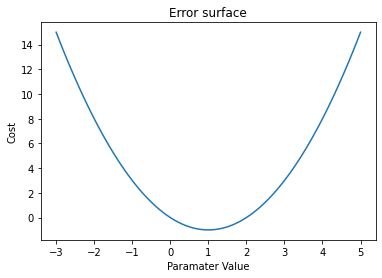

In [4]:
y_poly = cost_function(X_poly)
plt.plot(X_poly,y_poly)
plt.xlabel('Paramater Value')
plt.ylabel('Cost')
plt.title('Error surface')

In [7]:
#Create a function for the value of the gradient. This is the analytical deverivate of the cost function.
def gradient(x):
    return 2*x- 2

In [111]:
x_start = 4.5
learning_rate = 0.75
x_next = x_start - learning_rate * gradient(x_start)
x_next

-0.75

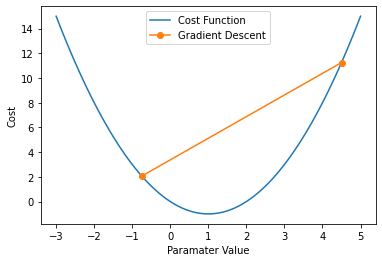

In [112]:
plt.plot(X_poly,y_poly)
plt.plot([x_start,x_next],[cost_function(x_start),cost_function(x_next)], '-o')
plt.xlabel('Paramater Value')
plt.ylabel('Cost')
plt.legend(['Cost Function','Gradient Descent'])

In [113]:
# Perform 14 interations to converge to the minimum
iterations = 14
x_path = np.empty(iterations,)

In [114]:
x_path[0] = x_start

In [115]:
for i in range(1,iterations):
    derivate = gradient(x_path[i-1])
    x_path[i] = x_path[i-1] - learning_rate * derivate



In [116]:
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275])

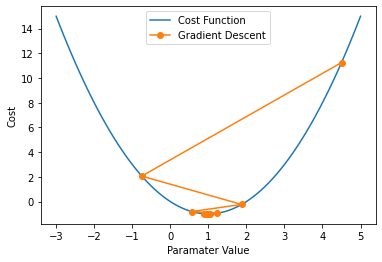

In [117]:
plt.plot(X_poly,y_poly)
plt.plot(x_path,cost_function(x_path), '-o')
plt.xlabel('Paramater Value')
plt.ylabel('Cost')
plt.legend(['Cost Function','Gradient Descent'])

In [118]:
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275])

### Exercice 17: Generating and Modeling synthetic data

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)


Genereting dataset

In [85]:
X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=200, n_informative=3, n_redundant=10, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=0.8,
hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=24)


In [86]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


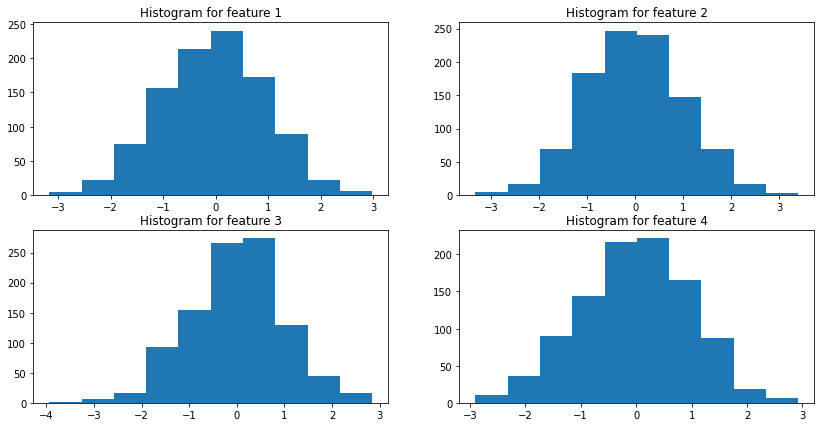

In [87]:
for plot_index in range(4):
    plt.subplot(2,2,plot_index+1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title(f'Histogram for feature {plot_index+1}')

Based on our "rule of thumb", 200 features is too many (especially going by the "rule of 10").
We have 500 observations in the rarest class, so by that rule we shouldn't have more than 50 features. It's possible that with so many features, which we don't have a good idea of the quality of, the model training procedure will overfit

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=24)
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)

In [89]:
lr_syn.fit(X_train, y_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [90]:
y_train_pred_proba = lr_syn.predict_proba(X_train)
print(roc_auc_score(y_train, y_train_pred_proba[:,1]))

0.9420000000000001


In [91]:
y_test_pred_proba = lr_syn.predict_proba(X_test)
print(roc_auc_score(y_test, y_test_pred_proba[:,1]))

0.8075807580758075


From these results, it's apparent that the logistic regression model has overfit the data. That is, the ROC AUC score on the training data is substantially higher than that of the testing data.

## Exercise 18: Reducing Overfitting on the Synthetic Data Classification Problem

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np

In [93]:
n_folds = 5
k_folds = KFold(n_splits=n_folds)


In [94]:
for train_index, test_index in k_folds.split(X_synthetic):
    print('Train:', train_index, 'Test:', test_index)
    X_train, X_test = X_synthetic[train_index], X_synthetic[test_index]
    y_train, y_test = y_synthetic[train_index], y_synthetic[test_index]

Train: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444

In [95]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)

In [96]:
k_folds.get_n_splits(X_synthetic)

5

In [97]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [98]:
C_vals = np.float(10)**C_val_exponents

C:\Users\cassi\AppData\Local\Temp/ipykernel_14128/3034316615.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_vals = np.float(10)**C_val_exponents


In [99]:
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [100]:
from sklearn.metrics import roc_curve

In [101]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):

    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        model.C = C_vals[c_val_counter]
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            model.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(lr_syn.C))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [128]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search(k_folds, C_vals, lr_syn, X_train, y_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation scores for each fold')

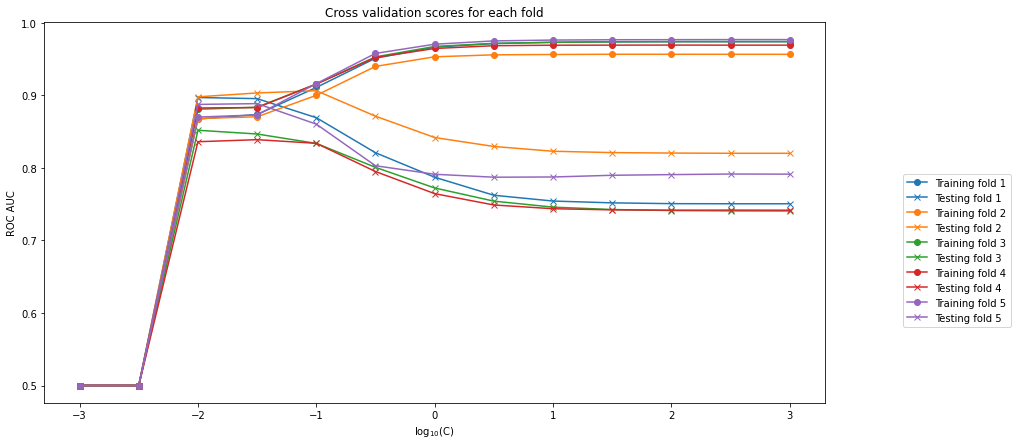

In [106]:
import matplotlib as mpl

cmap = mpl.cm.get_cmap('tab10')

for this_fold in range(k_folds.n_splits):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o',
             color=cmap(this_fold), label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x',
             color=cmap(this_fold), label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

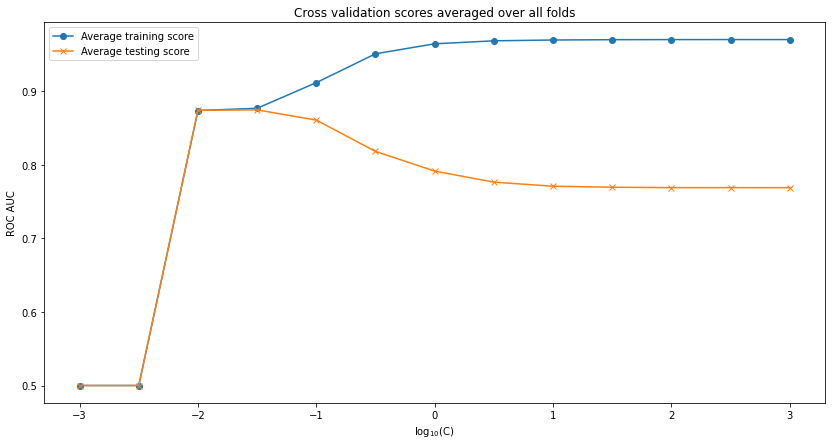

In [108]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

In [109]:
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [110]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix[0][0]

9

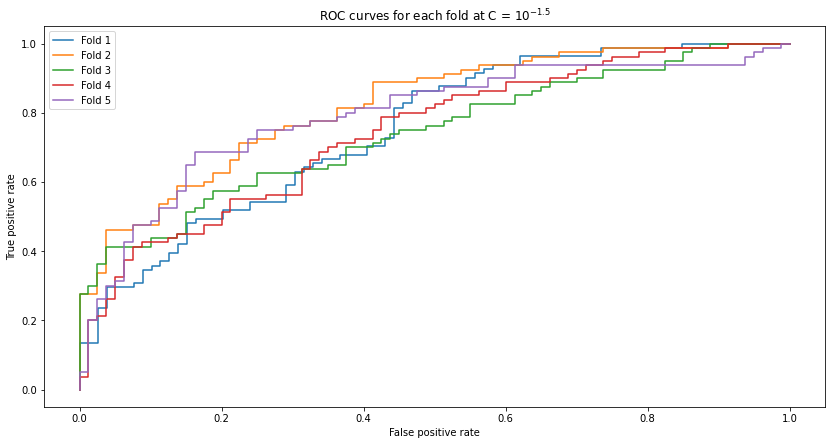

In [111]:
for this_fold in range(k_folds.n_splits):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

In [112]:
#Train on all trainning data with best C Value

In [122]:
lr_syn.C = 10**(-1.5)

In [123]:
lr_syn.fit(X_train, y_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [124]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_train)
print('Training ROC AUC: {}'.format(roc_auc_score(y_train, y_syn_train_predict_proba[:,1])))

Training ROC AUC: 0.8773617335108344


In [125]:
Y_syn_test_predict_proba = lr_syn.predict_proba(X_test)
print('Testing ROC AUC: {}'.format(roc_auc_score(y_test, Y_syn_test_predict_proba[:,1])))

Testing ROC AUC: 0.8989


In [126]:
lr_syn.intercept_


array([0.])

In [127]:
sum((lr_syn.coef_ != 0)[0])

4